# Data Augmentation
A common problem is the amount of data that is available to enter the models, so that they present the expected results it is necessary that the training occurs with a large amount of data (dataset), but often the data needed to perform these tasks are not available. This is where the Data Augmentation technique comes in, which, as its name suggests, allows us to increase our dataset in two ways:



*   Introducing disturbances in the original data. For example: taking a centered original image, we replicate it off-center, reversing axes...
*   Using different distributions. Ex: if we want to train a model to classify high resolution images, we add images of low resolution, with noise... always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

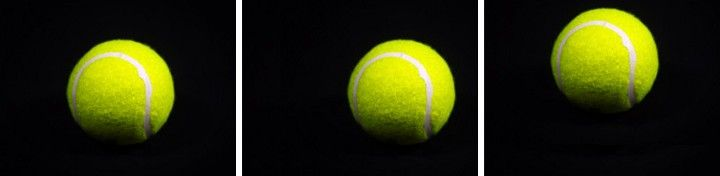



The same ball with some translations



So if we work with images, we only need to make some small alterations to our dataset and we can achieve our goal.
There are many ways of augmenting data with images, such as:

1.   Turn (Flip)
2.   Rotation

1.   Scale
2.   Cutting back

1.   Transfer
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is achieved by using the ImageDataGenerator class.
A variety of techniques as well as pixel scale methods are supported, such as:



*   Image changes (translations) through the arguments **width_shift_range** and **height_shift_range**.
*   Turn the image around with the arguments **horizontal_flip** and **vertical_flip***.
*   Rotations of images through the argument **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

More Arguments:
*  featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
*  samplewise_center: Boolean. Set each sample mean to 0.
*  featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
*  samplewise_std_normalization: Boolean. Divide each input by its std.
*  zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
*  zca_whitening: Boolean. Apply ZCA whitening.
*  rotation_range: Int. Degree range for random rotations.
*  width_shift_range: Float, 1-D array-like or int - float: fraction of total width, if < 1, or pixels if >= 1. - 1-D array-like: random elements from the array. - int: integer number of pixels from interval (-width_shift_range, +width_shift_range) - With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
*  height_shift_range: Float, 1-D array-like or int - float: fraction of total height, if < 1, or pixels if >= 1. - 1-D array-like: random elements from the array. - int: integer number of pixels from interval (-height_shift_range, +height_shift_range) - With height_shift_range=2 possible values are integers [-1, 0, +1], same as with height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
*  brightness_range: Tuple or list of two floats. Range for picking a brightness shift value from.
*  shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
*  zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
*  channel_shift_range: Float. Range for random channel shifts.
* fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode: - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) - 'nearest': aaaaaaaa|abcd|dddddddd - 'reflect': abcddcba|abcd|dcbaabcd - 'wrap': abcdabcd|abcd|abcdabcd
* cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
*  horizontal_flip: Boolean. Randomly flip inputs horizontally.
*  vertical_flip: Boolean. Randomly flip inputs vertically.
* rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
* preprocessing_function: function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
* data_format: Image data format, either "channels_first" or "channels_last". "channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".
* validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).
* dtype: Dtype to use for the generated arrays.

Let’s look independently at examples of images after they have been augmented. It is common to use a variety of augmentation techniques at the same time during training.


In [1]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


First we charge an image from the internet


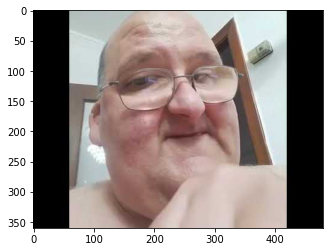

In [2]:
url = 'https://i.ytimg.com/vi/scJUwEr86O8/hqdefault.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let’s start with an image change that means moving all the pixels of the image in one direction, like horizontally or vertically, while maintaining the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


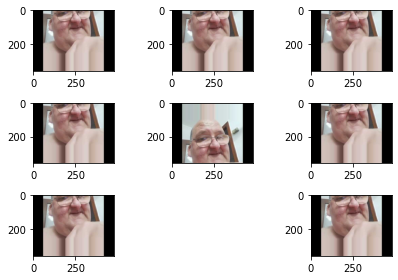

In [3]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means to invert rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.
The increment is specified by a boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**.

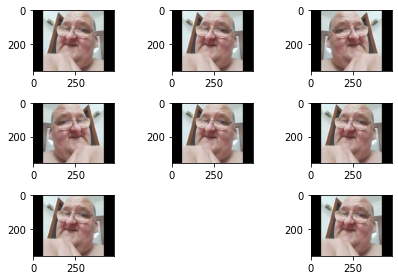

In [4]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The zoom amount is sampled evenly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

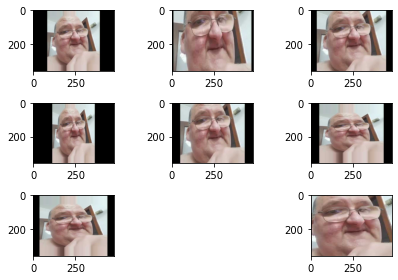

In [5]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

Rotate the image at random clockwise a certain number of degrees from 0 to 360. It is likely to rotate the pixels outside the frame of the image and leave areas of the frame without pixel data, which need to be completed.

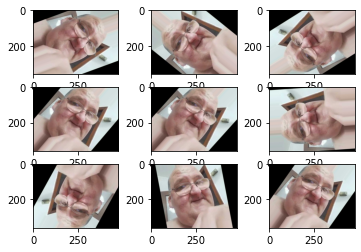

In [6]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data of the dataset to be used, in many jobs an increase of data is used to increase the amount of images of training and to improve the precision of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

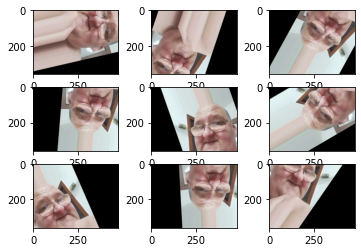

In [7]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of language (we cannot replace every word with its synonym and even if we do, we run the risk that the meaning of the sentence will change completely.
There are some bookshops that can help us to carry out this task, we will begin by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training and data augmentation in NLP. We will focus only on the increase in data.

In [8]:
!pip install textattack

     |████████████████████████████████| 327kB 20.4MB/s 
     |████████████████████████████████| 1.7MB 54.7MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 3.0MB 50.6MB/s 
     |████████████████████████████████| 317kB 51.5MB/s 
     |████████████████████████████████| 686kB 53.1MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 245kB 57.4MB/s 
     |████████████████████████████████| 778kB 44.2MB/s 
     |████████████████████████████████| 235kB 58.9MB/s 
     |████████████████████████████████| 1.1MB 49.7MB/s 
     |████████████████████████████████| 102kB 13.5MB/s 
     |████████████████████████████████| 153kB 51.1MB/s 
     |████████████████████████████████| 102kB 14.7MB/s 
     |████████████████████████████████| 163kB 57.0MB/s 
     |████████████████████████████████| 122kB 60.3MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 204kB 57.5MB

In [9]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 22:27:48 INFO: Downloading default packages for language: en (English)...
2020-10-16 22:33:29 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [10]:
text = "The way to get started is to quit talking and begin doing"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Increase the text by replacing it with synonyms from the WordNet thesaurus (thesaurus of synonyms).

WordNet is an English lexical database. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a distinct concept.
WordNet superficially resembles a thesaurus, as it groups words according to their meaning.



In [11]:
aug = WordNetAugmenter();
aug.augment(text)

['The mode to get started is to quit talking and begin doing']


## EmbeddingAugmenter
 Increase the text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [12]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:39<00:00, 12.1MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpwaonp_cy.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['The way to gets started is to quit talking and begin doing']

## CharSwapAugmenter
Increase text by replacing, deleting, inserting, and exchanging adjacent characters.

In [13]:
aug = CharSwapAugmenter()
aug.augment(text)

['Thi way to get started is to quit talking and begin doing']


## EasyDataAugmenter
This increases text with a combination of Wordnet synonyms replacement, word deletion, word order changes, and synonym insertions. All of these 4 features occur randomly. Then we get different results every time we run the code. This returns 4 increased results, unlike the other methods.

In [14]:
aug = EasyDataAugmenter()
aug.augment(text)

['The way to get started is quit talking and begin doing',
 'The way constitute to get started is to quit talking and begin doing',
 'The fashion to get started is to quit talking and begin doing',
 'The way to get started is talking quit to and begin doing']

Googletrans uses Google Translate’s Ajax API for language detection and translation.

The key parameters for the method **translate ()** are:



1.   **src**: source language. this parameter is optional as **googletrans** will detect it.
2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



By using this method what happens is a retranslation, we move from the original language to a target language and then we return to the original, during this back translation, there is a slight change in the sentence between the original text and the translated text, but the general meaning of prayer is still preserved.

Supported languages are available at https://cloud.google.com/translate/docs/languages?hl=es

To get the best results it is recommended to do some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, This becomes a bit of a trial and error problem.


Some examples of languages:


   Afrikaans  'af'

Chinese (simplified)   'zh-CN or zh'

   Esperanto  'eo'

   Japanese  'ja'
   Latin   'la'


   English  'en'


Turkmen  'tk'


   Yiddish  'yi'

   Zulu  'zu'



In [15]:
!pip install googletrans

     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 972kB 20.6MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 102kB 13.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=d5e0e283078040f6eb5a8a82766ea6130191d921949c8148fd42f016f0d2dbf0
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=3c9b68055165d385f8d8f5872bf812ac6d61d9c8eefbc6009b10ec0f4ac10834
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [16]:
from googletrans import Translator
translator = Translator()

In [17]:
origin_text = "The way to get started is to quit talking and begin doing"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

The way to get started is to quit talking and begin doing
Indlela yokuqalisa ukuyeka ukukhuluma bese uqala ukwenza
How to get started is to stop talking and start doing
